### 라이브러리 및 데이터 불러오기


In [40]:
import numpy as np
import pandas as pd

import warnings
# warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
X_features = pd.read_csv('/content/drive/MyDrive/data/bicycle/X_features.csv')
X_test = pd.read_csv('/content/drive/MyDrive/data/bicycle/X_test.csv')

X_train = pd.read_csv('/content/drive/MyDrive/data/bicycle/X_train.csv')
X_valid = pd.read_csv('/content/drive/MyDrive/data/bicycle/X_valid.csv')
y_train = pd.read_csv('/content/drive/MyDrive/data/bicycle/y_train.csv')
y_valid = pd.read_csv('/content/drive/MyDrive/data/bicycle/y_valid.csv')

test = pd.read_csv('/content/drive/MyDrive/data/bicycle/test.csv')

In [12]:
y_train.head()

,log_count
0,5.638355
1,6.725034
2,5.327876
3,4.007333
4,5.472271


### 지겨운 선형회귀

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

model.coef_

array([[ 8.44226395e+10,  8.44226395e+10,  9.42428589e-01,
        -3.68515015e-01, -2.85385132e-01, -5.05805969e-01,
         4.11262512e-02, -1.16939545e-02,  3.43822852e+11,
         1.44588470e-01,  1.37079239e-01,  2.29156113e+00,
         2.05293941e+00,  1.71955585e+00,  1.06285286e+00,
         4.50587273e-02,  6.73845291e-01,  1.54242802e+00,
         2.40862465e+00,  2.90464211e+00, -3.43822852e+11,
        -3.43822852e+11, -3.43822852e+11, -3.43822852e+11,
        -3.43822852e+11, -3.43822852e+11, -3.43822852e+11,
        -3.43822852e+11, -3.43822852e+11, -3.43822852e+11,
         2.86696902e+00,  2.66226566e+00,  2.48459029e+00,
         2.18980408e+00, -6.11572266e-01, -1.12289429e+00,
        -1.45117188e+00, -1.16435242e+00,  1.33456612e+00,
         2.16360044e+00,  2.32485962e+00, -3.43822852e+11,
         7.57568359e-01,  3.43822852e+11,  3.43822852e+11,
        -2.58819580e-01, -2.99980164e-01,  3.43822852e+11,
         3.43822852e+11,  3.43822852e+11,  8.42269897e-0

In [32]:
# RMSLE 값을 출력하는 함수
def rmsle(y,y_,convertExp=True):
    # 지수화 필요하다면
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [26]:
rmsle(y_pred, np.array(y_valid), convertExp=True) # 예측값, 실제값에 따른 RMSLE값

0.3367785496024343

### 큰 숫자로 처리 가능하게 데이터타입을 변경

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = np.exp(model.predict(X_test))

df = pd.DataFrame(test['datetime'])
df['count'] = prediction

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


,datetime,count
0,2011-01-20 00:00:00,12.597625
1,2011-01-20 01:00:00,6.396842
2,2011-01-20 02:00:00,3.300760
3,2011-01-20 03:00:00,2.337128
4,2011-01-20 04:00:00,2.586807
...,...,...
6488,2012-12-31 19:00:00,inf
6489,2012-12-31 20:00:00,inf
6490,2012-12-31 21:00:00,inf
6491,2012-12-31 22:00:00,inf


In [46]:
np.exp(12345)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


inf

- float64는 큰 숫자를 처리하지 못함
- float128로 수정 후 산출

In [47]:
prediction

array([[12.59762496],
       [ 6.39684208],
       [ 3.30076029],
       ...,
       [        inf],
       [        inf],
       [        inf]])

In [53]:
prediction = np.expm1(model.predict(X_test), dtype=np.float128)
prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.


array([[11.59762496],
       [ 5.39684208],
       [ 2.30076029],
       ...,
       [        inf],
       [        inf],
       [        inf]], dtype=float128)

- 먼저 expm1으로 exp 처리 (log1p로 처리했으니까)
- 데이터 타입을 float128로, 그래도 숫자가 아주 큰가보다해서 찾아봤음

In [54]:
model.predict(X_test)

array([[2.53350830e+00],
       [1.85580444e+00],
       [1.19415283e+00],
       ...,
       [2.16380564e+11],
       [2.16380564e+11],
       [2.16380564e+11]])

- 100억의 exp 처리를 하니 당연히 inf가 나오네요.

### 왜 log(예측값)이 큰 숫자가 나왔을까?

In [59]:
np.floor(np.log(1000000)) # 로그의 성질, 큰 숫자 또한 작게 변환해주는 성질

13.0

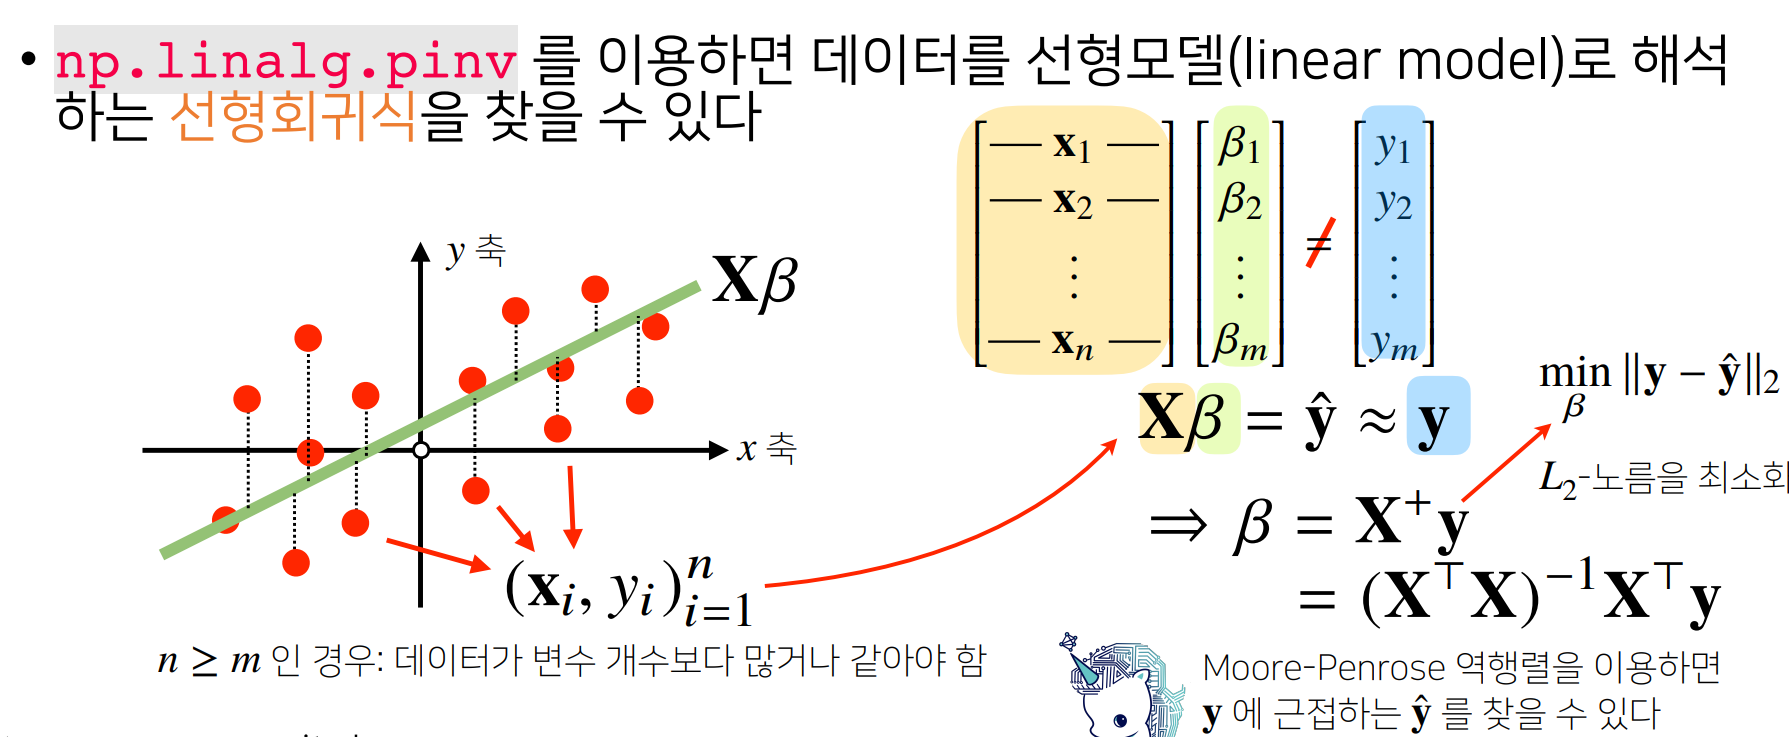

- 출처 : 네이버 부스트캠프

In [64]:
print(X_train.shape)
print(y_train.shape)

(7620, 78)
(7620, 1)


X * beta = y

(7620, 78) * (78, 1) = (7620, 1)

In [100]:
X = np.array(X_train)
y = np.array(y_train) # log 처리된 값

In [ ]:
beta = np.linalg.pinv(X) @ y # X * beta = y <=> beta = X_inv * y_train
beta

In [102]:
beta.reshape(78//3, 3) # 비교하며 보기좋게 차원 변경

array([[ 1.05457105e+00,  7.02843715e-01,  9.42722799e-01],
       [-3.68904103e-01, -2.84671414e-01, -5.04796325e-01],
       [ 4.12077502e-02, -1.22564719e-02,  2.04264569e+00],
       [ 1.44239003e-01,  1.34545435e-01,  2.29311626e+00],
       [ 2.04985430e+00,  1.72152568e+00,  1.06391998e+00],
       [ 4.23709292e-02,  6.76045629e-01,  1.54120052e+00],
       [ 2.40716169e+00,  2.90403980e+00,  1.22167923e+00],
       [ 1.40835188e+00,  1.52382049e+00,  1.55015579e+00],
       [ 1.51304132e+00,  1.50909336e+00,  1.48317538e+00],
       [ 1.40653684e+00,  1.28729566e+00,  1.09377117e+00],
       [ 2.86615068e+00,  2.66362558e+00,  2.48595923e+00],
       [ 2.19220500e+00, -6.12049360e-01, -1.12165438e+00],
       [-1.44911577e+00, -1.16565385e+00,  1.33365011e+00],
       [ 2.16068816e+00,  2.32592781e+00, -7.13849468e-02],
       [ 7.56411258e-01,  1.78862687e+00,  1.70515842e+00],
       [-2.57250974e-01, -3.05002517e-01,  1.68508406e+00],
       [ 1.74350185e+00,  2.15886792e+00

In [103]:
model.coef_ # linear Regression 에서의 회귀계수는?

array([[ 8.44226395e+10,  8.44226395e+10,  9.42428589e-01,
        -3.68515015e-01, -2.85385132e-01, -5.05805969e-01,
         4.11262512e-02, -1.16939545e-02,  3.43822852e+11,
         1.44588470e-01,  1.37079239e-01,  2.29156113e+00,
         2.05293941e+00,  1.71955585e+00,  1.06285286e+00,
         4.50587273e-02,  6.73845291e-01,  1.54242802e+00,
         2.40862465e+00,  2.90464211e+00, -3.43822852e+11,
        -3.43822852e+11, -3.43822852e+11, -3.43822852e+11,
        -3.43822852e+11, -3.43822852e+11, -3.43822852e+11,
        -3.43822852e+11, -3.43822852e+11, -3.43822852e+11,
         2.86696902e+00,  2.66226566e+00,  2.48459029e+00,
         2.18980408e+00, -6.11572266e-01, -1.12289429e+00,
        -1.45117188e+00, -1.16435242e+00,  1.33456612e+00,
         2.16360044e+00,  2.32485962e+00, -3.43822852e+11,
         7.57568359e-01,  3.43822852e+11,  3.43822852e+11,
        -2.58819580e-01, -2.99980164e-01,  3.43822852e+11,
         3.43822852e+11,  3.43822852e+11,  8.42269897e-0

In [104]:
beta.reshape(78//3, 3) - model.coef_.reshape(78//3, 3)

array([[-8.44226395e+10, -8.44226395e+10,  2.94209726e-04],
       [-3.89087951e-04,  7.13717469e-04,  1.00964377e-03],
       [ 8.14989909e-05, -5.62517413e-04, -3.43822852e+11],
       [-3.49467912e-04, -2.53380413e-03,  1.55513252e-03],
       [-3.08511319e-03,  1.96982295e-03,  1.06712469e-03],
       [-2.68779804e-03,  2.20033804e-03, -1.22749371e-03],
       [-1.46295694e-03, -6.02301253e-04,  3.43822852e+11],
       [ 3.43822852e+11,  3.43822852e+11,  3.43822852e+11],
       [ 3.43822852e+11,  3.43822852e+11,  3.43822852e+11],
       [ 3.43822852e+11,  3.43822852e+11,  3.43822852e+11],
       [-8.18339747e-04,  1.35991709e-03,  1.36893517e-03],
       [ 2.40092143e-03, -4.77094038e-04,  1.23990253e-03],
       [ 2.05610346e-03, -1.30143407e-03, -9.16001771e-04],
       [-2.91228738e-03,  1.06819235e-03,  3.43822852e+11],
       [-1.15710152e-03, -3.43822852e+11, -3.43822852e+11],
       [ 1.56860587e-03, -5.02235341e-03, -3.43822852e+11],
       [-3.43822852e+11, -3.43822852e+11

- 차이가 많이 나네요. 행렬로 계산해서 beta를 추정하는 것과 최소제곱법의 차이가 꽤큼

In [105]:
Y_pred_matrix = np.array(X_test) @ beta # y_pred
Y_pred_matrix

array([[2.53421258],
       [1.85353253],
       [1.19774251],
       ...,
       [4.76964375],
       [4.5314854 ],
       [4.04637304]])

In [106]:
# log처리했으니 예측값을 exp로 다시 처리
np.exp(Y_pred_matrix)

array([[ 12.60650037],
       [  6.38232548],
       [  3.31263026],
       ...,
       [117.87724038],
       [ 92.89644664],
       [ 57.18965569]])

In [84]:
# 행렬 계산으로 선형회귀 적합한 결과
df_maxrix = pd.DataFrame(test['datetime'])
df_maxrix['count'] = np.exp(Y_pred_matrix)

df_maxrix.to_csv('compute_matrix_linearReg_2.csv', index=False)

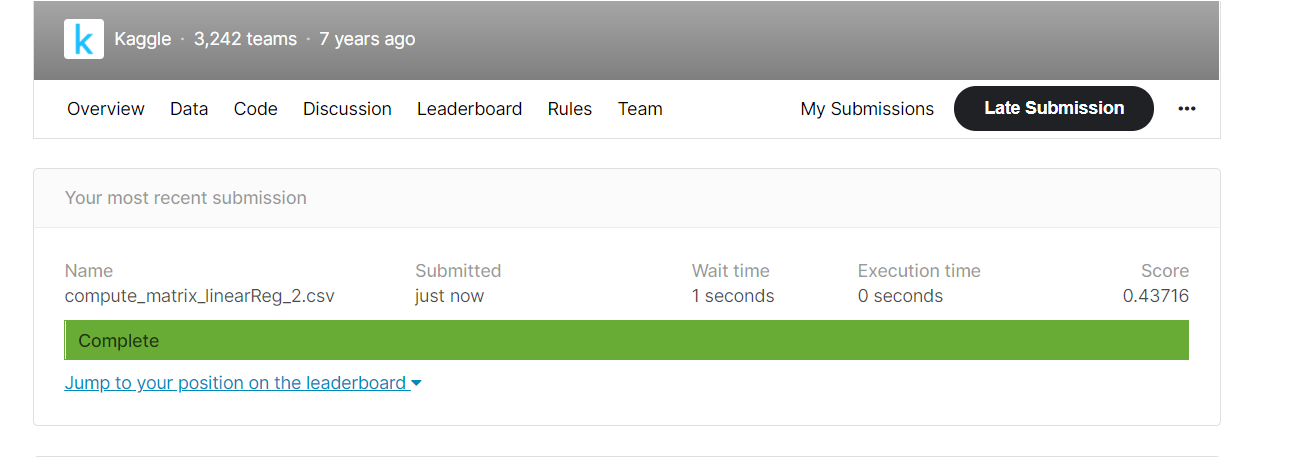

- intercept 항 제외해서 푼거라 크게 의미 없을 거같음
- 항이 추가되면 약간 ? 올라갈 것이라 예상
- 사실 intercept항 계산하는 거 해결 못해서 여기까지만 해보려고요 ㅎㅎ

In [117]:
theta_best_svd, residual, rank, s = np.linalg.lstsq(X, y, rcond=1e-6) # 추정된 회귀계수, 잔차, rank, X의 특이값

In [122]:
theta_best_svd.reshape(78//3, 3)

array([[ 1.05457105e+00,  7.02843715e-01,  9.42722799e-01],
       [-3.68904103e-01, -2.84671414e-01, -5.04796325e-01],
       [ 4.12077502e-02, -1.22564719e-02,  2.04264569e+00],
       [ 1.44239003e-01,  1.34545435e-01,  2.29311626e+00],
       [ 2.04985430e+00,  1.72152568e+00,  1.06391998e+00],
       [ 4.23709292e-02,  6.76045629e-01,  1.54120052e+00],
       [ 2.40716169e+00,  2.90403980e+00,  1.22167923e+00],
       [ 1.40835188e+00,  1.52382049e+00,  1.55015579e+00],
       [ 1.51304132e+00,  1.50909336e+00,  1.48317538e+00],
       [ 1.40653684e+00,  1.28729566e+00,  1.09377117e+00],
       [ 2.86615068e+00,  2.66362558e+00,  2.48595923e+00],
       [ 2.19220500e+00, -6.12049360e-01, -1.12165438e+00],
       [-1.44911577e+00, -1.16565385e+00,  1.33365011e+00],
       [ 2.16068816e+00,  2.32592781e+00, -7.13849468e-02],
       [ 7.56411258e-01,  1.78862687e+00,  1.70515842e+00],
       [-2.57250974e-01, -3.05002517e-01,  1.68508406e+00],
       [ 1.74350185e+00,  2.15886792e+00

In [124]:
model.coef_.reshape(78//3, 3)

array([[ 8.44226395e+10,  8.44226395e+10,  9.42428589e-01],
       [-3.68515015e-01, -2.85385132e-01, -5.05805969e-01],
       [ 4.11262512e-02, -1.16939545e-02,  3.43822852e+11],
       [ 1.44588470e-01,  1.37079239e-01,  2.29156113e+00],
       [ 2.05293941e+00,  1.71955585e+00,  1.06285286e+00],
       [ 4.50587273e-02,  6.73845291e-01,  1.54242802e+00],
       [ 2.40862465e+00,  2.90464211e+00, -3.43822852e+11],
       [-3.43822852e+11, -3.43822852e+11, -3.43822852e+11],
       [-3.43822852e+11, -3.43822852e+11, -3.43822852e+11],
       [-3.43822852e+11, -3.43822852e+11, -3.43822852e+11],
       [ 2.86696902e+00,  2.66226566e+00,  2.48459029e+00],
       [ 2.18980408e+00, -6.11572266e-01, -1.12289429e+00],
       [-1.45117188e+00, -1.16435242e+00,  1.33456612e+00],
       [ 2.16360044e+00,  2.32485962e+00, -3.43822852e+11],
       [ 7.57568359e-01,  3.43822852e+11,  3.43822852e+11],
       [-2.58819580e-01, -2.99980164e-01,  3.43822852e+11],
       [ 3.43822852e+11,  3.43822852e+11